In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
#loading the data to data frame
gold_data=pd.read_csv('/content/gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#print the last 5 rows of the data
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#number of rows and columns
gold_data.shape

(2290, 6)

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#check the null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
#finding correlation between features this gives us the correlation between the features
correlation=gold_data.corr()

<ipython-input-11-477f2175c500>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=gold_data.corr()


<Axes: >

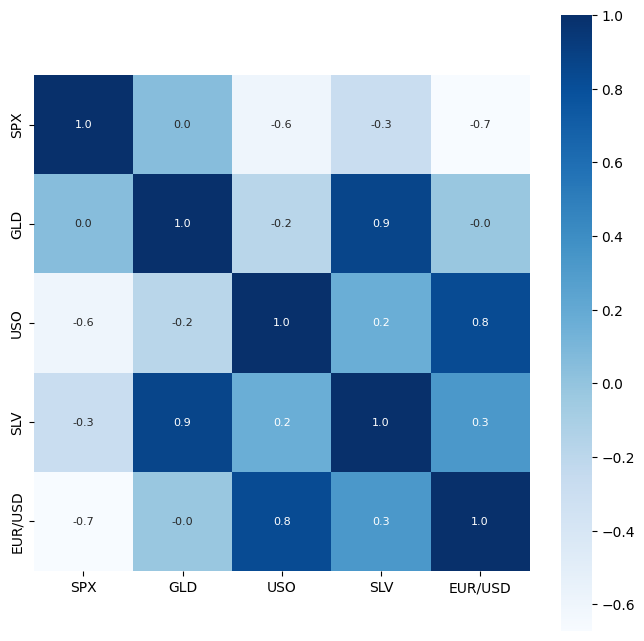

In [12]:
#understanding the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [13]:
#correlation values
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


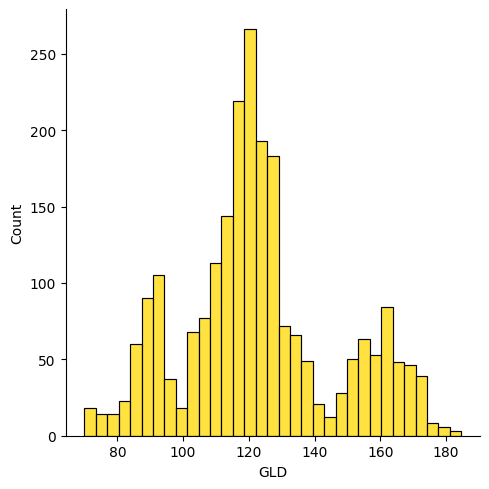

In [16]:
#check the distribution of gld
sns.displot(gold_data['GLD'],color='gold')

In [18]:
#splitting the features and the targets
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']


In [19]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [21]:
#spliting to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [24]:
#model training using random forest
regressor=RandomForestRegressor(n_estimators=100)

In [25]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [26]:
#model evaluation
test_data_prediction=regressor.predict(x_test)

In [27]:
print(test_data_prediction)

[168.56379991  82.22659974 116.15959984 127.54930058 120.70280153
 154.77099749 150.41539852 126.02440038 117.66829866 125.90010101
 116.76160104 172.44060088 141.41559802 167.93169871 115.14459988
 117.76000053 139.43790315 170.01750063 159.34590208 156.23439972
 155.06720044 125.43810029 175.75900052 156.59590397 125.24810041
  93.67159997  77.81440002 121.01420035 119.00999909 167.54109865
  88.33940065 125.31630035  90.93970039 117.68270027 121.09149921
 136.4734008  115.39080135 115.23870045 148.74039946 107.02220106
 104.19870249  87.19109782 126.40670016 117.63640001 152.77499877
 119.7484003  108.48159994 108.09699817  93.17140053 127.08459807
  74.94010027 113.57909934 121.80000014 111.31949887 118.89099918
 121.2176994  159.11610039 167.13850128 146.95019682  85.87619828
  94.3500005   86.74819876  90.61030042 118.96800059 126.43210063
 127.47069987 169.48640025 122.14749942 117.28869878  98.38360014
 168.27300175 142.50339822 132.26300239 121.18870216 120.82549951
 119.68370

In [29]:
#R squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print('R squared error:',error_score)

R squared error: 0.9885124677677356


In [30]:
#comparing the actual values in plot but first convert y_test to list
y_test=list(y_test)


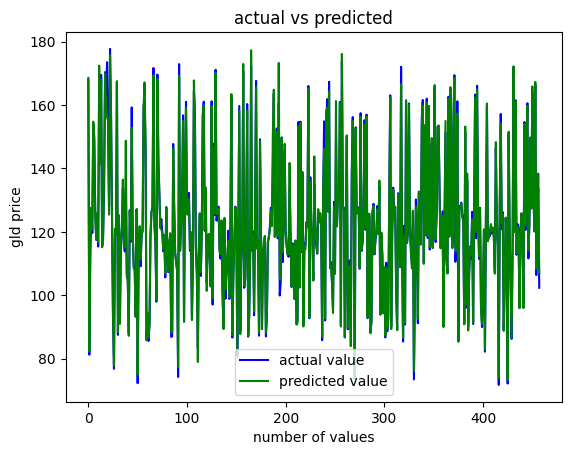

In [31]:
plt.plot(y_test,color='blue',label='actual value')
plt.plot(test_data_prediction,color='green',label='predicted value')
plt.title('actual vs predicted')
plt.xlabel('number of values')
plt.ylabel('gld price')
plt.legend()
plt.show()